In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train=train_datagen.flow_from_directory(r'C:\Users\LEGION\Desktop\Externship_SmartBridge\Assignment-4 dataset\Garbage classification\Garbage classification',target_size=(64,64),
                                          class_mode='categorical',batch_size=100)

Found 2527 images belonging to 6 classes.


In [5]:
len(x_train)

26

In [6]:
x_train.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

Importing Libraries

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

Creating Model

In [8]:
model=Sequential()

Adding Layers

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
##Hidden Layer 1
model.add(Dense(300,activation='relu'))
##Hidden Layer 2
model.add(Dense(150,activation='relu'))

Output Layer

In [13]:
model.add(Dense(6,activation='softmax'))

Compile the model

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model

In [15]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)

C:\Users\LEGION\AppData\Local\Temp/ipykernel_10324/3129788946.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10)


Epoch 1/10
26/26 [==============================] - 11s 388ms/step - loss: 2.3355 - accuracy: 0.2612
Epoch 2/10
26/26 [==============================] - 11s 423ms/step - loss: 1.4843 - accuracy: 0.3894
Epoch 3/10
26/26 [==============================] - 11s 403ms/step - loss: 1.3399 - accuracy: 0.4658
Epoch 4/10
26/26 [==============================] - 10s 401ms/step - loss: 1.2521 - accuracy: 0.5101
Epoch 5/10
26/26 [==============================] - 10s 396ms/step - loss: 1.1806 - accuracy: 0.5378
Epoch 6/10
26/26 [==============================] - 10s 395ms/step - loss: 1.1213 - accuracy: 0.5627
Epoch 7/10
26/26 [==============================] - 10s 400ms/step - loss: 1.0798 - accuracy: 0.5888
Epoch 8/10
26/26 [==============================] - 10s 397ms/step - loss: 1.0249 - accuracy: 0.6086
Epoch 9/10
26/26 [==============================] - 10s 398ms/step - loss: 0.9814 - accuracy: 0.6312
Epoch 10/10
26/26 [==============================] - 11s 416ms/step - loss: 0.9603 - accura

Save the model


In [16]:
model.save('garbage.h5')

Testing the model

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model=load_model('garbage.h5')
img=image.load_img(r'C:\Users\LEGION\Desktop\Externship_SmartBridge\Assignment-4 dataset\Garbage classification\Garbage classification\glass\glass19.jpg',
                   target_size=(64,64))

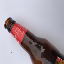

In [19]:
img

In [20]:
x=image.img_to_array(img)

In [21]:
x

array([[[221., 223., 236.],
        [218., 220., 233.],
        [217., 219., 232.],
        ...,
        [176., 176., 188.],
        [175., 175., 187.],
        [175., 175., 187.]],

       [[218., 220., 233.],
        [218., 220., 233.],
        [217., 219., 232.],
        ...,
        [175., 175., 187.],
        [174., 174., 186.],
        [174., 174., 186.]],

       [[218., 220., 233.],
        [218., 220., 233.],
        [217., 219., 232.],
        ...,
        [175., 175., 187.],
        [174., 174., 186.],
        [172., 172., 184.]],

       ...,

       [[215., 217., 230.],
        [214., 216., 229.],
        [214., 216., 231.],
        ...,
        [110.,  75.,  43.],
        [118.,  67.,  24.],
        [156.,  95.,  66.]],

       [[217., 219., 232.],
        [214., 216., 229.],
        [214., 216., 231.],
        ...,
        [132.,  94.,  45.],
        [ 69.,  36.,   0.],
        [113.,  76.,  34.]],

       [[218., 220., 233.],
        [215., 217., 230.],
        [214., 2

In [22]:
x.ndim

3

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x

array([[[[221., 223., 236.],
         [218., 220., 233.],
         [217., 219., 232.],
         ...,
         [176., 176., 188.],
         [175., 175., 187.],
         [175., 175., 187.]],

        [[218., 220., 233.],
         [218., 220., 233.],
         [217., 219., 232.],
         ...,
         [175., 175., 187.],
         [174., 174., 186.],
         [174., 174., 186.]],

        [[218., 220., 233.],
         [218., 220., 233.],
         [217., 219., 232.],
         ...,
         [175., 175., 187.],
         [174., 174., 186.],
         [172., 172., 184.]],

        ...,

        [[215., 217., 230.],
         [214., 216., 229.],
         [214., 216., 231.],
         ...,
         [110.,  75.,  43.],
         [118.,  67.,  24.],
         [156.,  95.,  66.]],

        [[217., 219., 232.],
         [214., 216., 229.],
         [214., 216., 231.],
         ...,
         [132.,  94.,  45.],
         [ 69.,  36.,   0.],
         [113.,  76.,  34.]],

        [[218., 220., 233.],
       

In [25]:
x.ndim

4

In [26]:
pred=np.argmax(model.predict(x),axis=1)

In [27]:
pred

array([1], dtype=int64)

In [28]:
index=['cardboard','glass','metal','paper','plastic','trash']
print(index[pred[0]])

glass


Open CV

In [29]:
import cv2

In [30]:
img=cv2.imread(r'C:\Users\LEGION\Desktop\Externship_SmartBridge\Assignment-4 dataset\Garbage classification\Garbage classification\glass\glass19.jpg',1)

In [31]:
img

array([[[237, 224, 222],
        [237, 224, 222],
        [237, 224, 222],
        ...,
        [185, 173, 173],
        [185, 173, 173],
        [185, 173, 173]],

       [[237, 224, 222],
        [237, 224, 222],
        [237, 224, 222],
        ...,
        [186, 174, 174],
        [185, 173, 173],
        [185, 173, 173]],

       [[237, 224, 222],
        [237, 224, 222],
        [237, 224, 222],
        ...,
        [186, 174, 174],
        [186, 174, 174],
        [185, 173, 173]],

       ...,

       [[235, 222, 220],
        [234, 221, 219],
        [234, 221, 219],
        ...,
        [ 28,  73, 111],
        [ 27,  73, 114],
        [ 32,  78, 119]],

       [[235, 222, 220],
        [235, 222, 220],
        [234, 221, 219],
        ...,
        [ 30,  78, 112],
        [ 37,  85, 121],
        [ 30,  78, 114]],

       [[235, 222, 220],
        [235, 222, 220],
        [235, 222, 220],
        ...,
        [  9,  58,  90],
        [ 41,  89, 123],
        [ 55, 103, 137]]

In [32]:
img1=cv2.imread(r'C:\Users\LEGION\Desktop\Externship_SmartBridge\Assignment-4 dataset\Garbage classification\Garbage classification\glass\glass19.jpg',0)

In [33]:
img1

array([[225, 225, 225, ..., 174, 174, 174],
       [225, 225, 225, ..., 175, 174, 174],
       [225, 225, 225, ..., 175, 175, 174],
       ...,
       [223, 222, 222, ...,  79,  80,  85],
       [223, 223, 222, ...,  83,  90,  83],
       [223, 223, 223, ...,  62,  94, 108]], dtype=uint8)

In [34]:
print(img.shape)

(384, 512, 3)


In [35]:
img=cv2.imread(r'C:\Users\LEGION\Desktop\Externship_SmartBridge\Assignment-4 dataset\Garbage classification\Garbage classification\glass\glass19.jpg',1)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

CNN Video Analysis

In [36]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('garbage.h5')
video=cv2.VideoCapture(0)
index=['cardboard','glass','metal','paper','plastic','trash']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    cv2.putText(frame,'The Predicted Garbage is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()  